In [1]:
# random forest predict whether patient has diabetes on medical data
# when to use? --> High accuracy needed, large feature space, avoid overfitting

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=columns)
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
x = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
# n_estimators =100 : uses 100 trees for better prediction stability
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533

Confusion Matrix:
 [[121  30]
 [ 27  53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



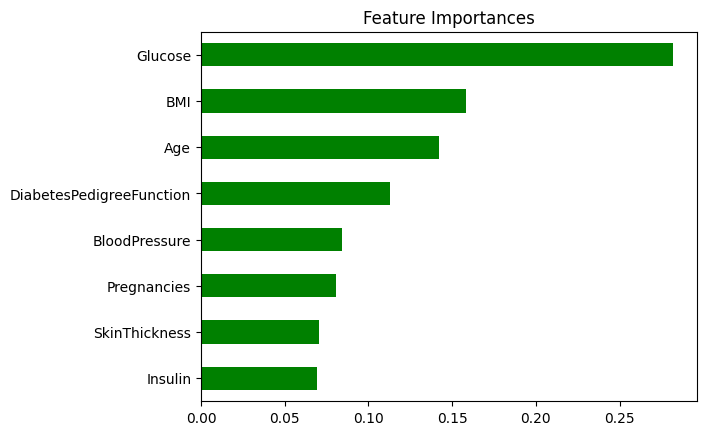

In [7]:
importances = pd.Series(model.feature_importances_,index = x.columns)
importances.sort_values().plot(kind='barh', title="Feature Importances",color ="green")
plt.show()